----------
## Importing Libraries

In [10]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay #changed From sklearn 1.2
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix

# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

------
## Reading Data

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
Trained_Data = pd.read_csv("/content/drive/MyDrive/KDD/nsl-kdd/KDDTrain+.txt" , sep = "," , encoding = 'utf-8')
Tested_Data  = pd.read_csv("/content/drive/MyDrive/KDD/nsl-kdd/KDDTest+.txt" , sep = "," , encoding = 'utf-8')

---------
## Exploring Data

In [13]:
Trained_Data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [14]:
Tested_Data

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


---------
## Columns Modification

In [15]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [16]:
Trained_Data.columns = Columns
Tested_Data.columns  = Columns

#### Removing Hyperlinks, Punctuation, and Standardizing Format

In [17]:
# List of columns I want to modify (string-type columns)
text_columns = ['protocol_type', 'service', 'flag', 'attack']

# Function to clean text
def clean_text(text):
    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove leading/trailing whitespace and convert to lowercase
    text = text.strip().replace(' ', '').lower()
    return text

# Loop over each text column
for col in text_columns:
    # Apply cleaning function to each value in the column
    Trained_Data[col] = Trained_Data[col].apply(clean_text)
    Tested_Data[col] = Tested_Data[col].apply(clean_text)

In [18]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,sf,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,s0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,sf,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,sf,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,rej,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,s0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,s0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remotejob,s0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,s0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,rej,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [19]:
Tested_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,rej,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftpdata,sf,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,ecoi,sf,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,rsto,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,sf,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,sf,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,sf,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guesspasswd,15
7,0,tcp,http,sf,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,sf,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guesspasswd,7
9,0,tcp,telnet,sf,0,0,0,0,0,0,...,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


-------
## Data Description

In [20]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [21]:
# All the datatypes in our dataset
Trained_Data.dtypes.value_counts()

int64      24
float64    15
object      4
Name: count, dtype: int64

In [22]:
Tested_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [23]:
# All the datatypes in our dataset
Tested_Data.dtypes.value_counts()

int64      24
float64    15
object      4
Name: count, dtype: int64

In [24]:
Trained_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [25]:
Tested_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [26]:
Trained_Data.describe(include='object')

,protocol_type,service,flag,attack
count,125972,125972,125972,125972
unique,3,68,11,23
top,tcp,http,sf,normal
freq,102688,40338,74944,67342


In [27]:
Trained_Data.nunique()

duration                       2981
protocol_type                     3
service                          68
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [28]:
Tested_Data.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [29]:
Trained_Data.max()

duration                             42908
protocol_type                          udp
service                              z3950
flag                                    sh
src_bytes                       1379963888
dst_bytes                       1309937401
land                                     1
wrong_fragment                           3
urgent                                   3
hot                                     77
num_failed_logins                        5
logged_in                                1
num_compromised                       7479
root_shell                               1
su_attempted                             2
num_root                              7468
num_file_creations                      43
num_shells                               2
num_access_files                         9
num_outbound_cmds                        0
is_host_login                            1
is_guest_login                           1
count                                  511
srv_count  

In [30]:
Tested_Data.max()

duration                          57715
protocol_type                       udp
service                           z3950
flag                                 sh
src_bytes                      62825648
dst_bytes                       1345927
land                                  1
wrong_fragment                        3
urgent                                3
hot                                 101
num_failed_logins                     4
logged_in                             1
num_compromised                     796
root_shell                            1
su_attempted                          2
num_root                            878
num_file_creations                  100
num_shells                            5
num_access_files                      4
num_outbound_cmds                     0
is_host_login                         1
is_guest_login                        1
count                               511
srv_count                           511
serror_rate                         1.0


-----
### Exploring Responses

In [31]:
Results = set(Trained_Data['attack'].values)
print(Results,end=" ")

{'teardrop', 'spy', 'ftpwrite', 'warezclient', 'neptune', 'phf', 'satan', 'perl', 'back', 'portsweep', 'land', 'smurf', 'ipsweep', 'guesspasswd', 'rootkit', 'loadmodule', 'warezmaster', 'nmap', 'multihop', 'normal', 'bufferoverflow', 'pod', 'imap'} 

In [32]:
attack_counts = Trained_Data['attack'].value_counts()

In [33]:
print(attack_counts)

attack
normal            67342
neptune           41214
satan              3633
ipsweep            3599
portsweep          2931
smurf              2646
nmap               1493
back                956
teardrop            892
warezclient         890
pod                 201
guesspasswd          53
bufferoverflow       30
warezmaster          20
land                 18
imap                 11
rootkit              10
loadmodule            9
ftpwrite              8
multihop              7
phf                   4
perl                  3
spy                   2
Name: count, dtype: int64


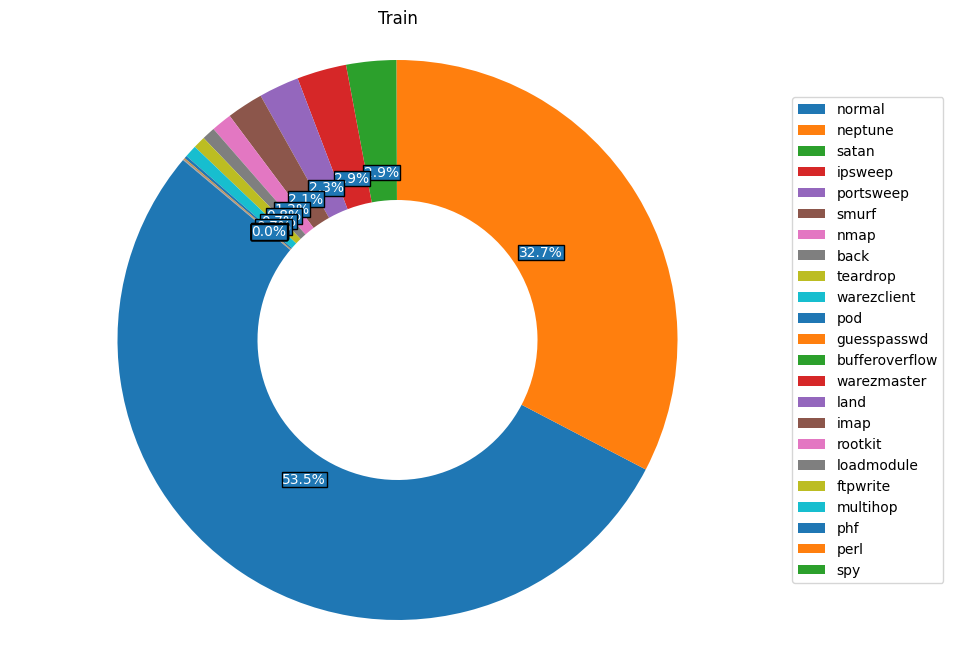

In [34]:
# Plotting the pie chart for trained_data
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(attack_counts, autopct='%1.1f%%', startangle=140, textprops=dict(color="w"), wedgeprops=dict(width=0.5))
plt.title('Train')

# Create a separate legend for the labels
plt.legend(wedges, attack_counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Increase label distance
for autotext in autotexts:
    autotext.set_bbox(dict(pad=0.5))

plt.axis('equal')
plt.show()

In [35]:
attack_counts = Tested_Data['attack'].value_counts()

In [36]:
print(attack_counts)

attack
normal            9711
neptune           4656
guesspasswd       1231
mscan              996
warezmaster        944
apache2            737
satan              735
processtable       685
smurf              665
back               359
snmpguess          331
saint              319
mailbomb           293
snmpgetattack      178
portsweep          157
ipsweep            141
                   133
nmap                73
pod                 41
bufferoverflow      20
multihop            18
named               17
ps                  15
sendmail            14
rootkit             13
xterm               13
teardrop            12
xlock                9
land                 7
xsnoop               4
ftpwrite             3
worm                 2
loadmodule           2
perl                 2
sqlattack            2
udpstorm             2
phf                  2
imap                 1
Name: count, dtype: int64


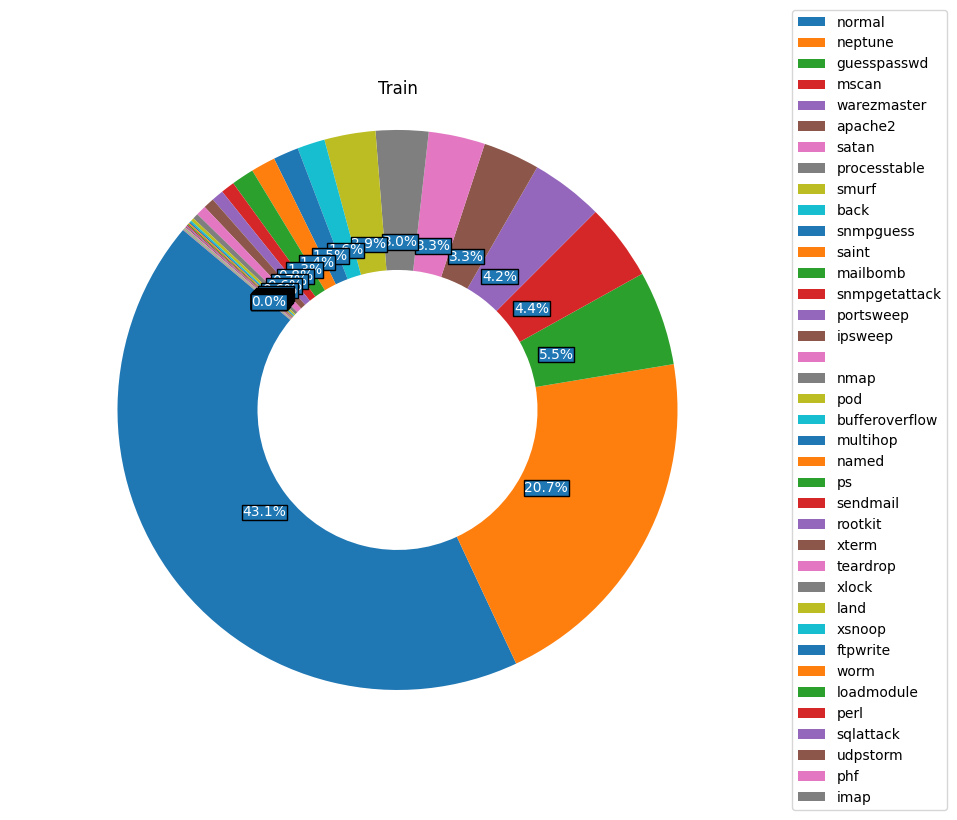

In [37]:
# Plotting the pie chart for tested_data
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(attack_counts, autopct='%1.1f%%', startangle=140, textprops=dict(color="w"), wedgeprops=dict(width=0.5))
plt.title('Train')

# Create a separate legend for the labels
plt.legend(wedges, attack_counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Increase label distance
for autotext in autotexts:
    autotext.set_bbox(dict(pad=0.5))

plt.axis('equal')
plt.show()

## Classifying The Attack Results

In [38]:
Trained_attack = Trained_Data.attack.map(lambda a: 0 if a == 'normal' else 1)
Tested_attack = Tested_Data.attack.map(lambda a: 0 if a == 'normal' else 1)

Trained_Data['attack_state'] = Trained_attack
Tested_Data['attack_state'] = Tested_attack

In [39]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,sf,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,s0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,sf,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,sf,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,rej,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1
5,0,tcp,private,s0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
6,0,tcp,private,s0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
7,0,tcp,remotejob,s0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
8,0,tcp,private,s0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
9,0,tcp,private,rej,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [40]:
Tested_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,tcp,private,rej,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1
1,2,tcp,ftpdata,sf,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21,0
2,0,icmp,ecoi,sf,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15,1
3,1,tcp,telnet,rsto,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11,1
4,0,tcp,http,sf,267,14515,0,0,0,0,...,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21,0
5,0,tcp,smtp,sf,1022,387,0,0,0,0,...,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21,0
6,0,tcp,telnet,sf,129,174,0,0,0,0,...,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guesspasswd,15,1
7,0,tcp,http,sf,327,467,0,0,0,0,...,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21,0
8,0,tcp,ftp,sf,26,157,0,0,0,0,...,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guesspasswd,7,1
9,0,tcp,telnet,sf,0,0,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9,1


In [41]:
Trained_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [42]:
Tested_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

-----
- **There is no missing data**

--------
### Checking for Duplicates

In [43]:
Trained_Data.duplicated().sum()

0

In [44]:
Tested_Data.duplicated().sum()

0

---------
- **There is no duplicated data**

In [48]:
# Save the cleaned DataFrames to CSV files
Trained_Data.to_csv('Cleaned_KDD_Trained_Data.txt', index=False)
Tested_Data.to_csv('Cleaned_KDD_Tested_Data.txt', index=False)

print("Cleaned_Trained_Data has been saved as 'Cleaned_KDD_Trained_Data.txt'")
print("Cleaned_Tested_Data has been saved as 'Cleaned__KDD_Tested_Data.txt'")

Cleaned_Trained_Data has been saved as 'Cleaned_KDD_Trained_Data.txt'
Cleaned_Tested_Data has been saved as 'Cleaned__KDD_Tested_Data.txt'


%cd /content/drive/MyDrive/KDD/nsl-kdd/NSLKDD

In [51]:
!git clone https://github.com/snehasrini99/Network_attack_classification.git

Cloning into 'Network_attack_classification'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 78 (delta 25), reused 14 (delta 3), pack-reused 0
Receiving objects: 100% (78/78), 6.36 MiB | 6.41 MiB/s, done.
Resolving deltas: 100% (25/25), done.
